> # NYC Taxi Data Analysis Complete Workflow

> ## Project Overview
This notebook contains a comprehensive analysis of NYC Yellow Taxi trip data of 1st Quarter 2016 (January-March). The analysis includes data loading, exploration, cleaning, outlier treatment, and statistical insights.
Dataset Information
- Source: NYC Yellow Taxi Trip Records 
- Link: [NYC Yellow Taxi Trip Dataset on Kaggle](https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data)

- Period: January - March 2016
- Original Files: 3 monthly CSV files
- Final Dataset: Cleaned and outlier-treated Parquet format

> # NYC Taxi Dataset Field Descriptions

| Field Name            | Description                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **VendorID**           | A code indicating the TPEP provider that provided the record.<br>• 1 = Creative Mobile Technologies<br>• 2 = VeriFone Inc. |
| **tpep_pickup_datetime** | The date and time when the meter was engaged.                             |
| **tpep_dropoff_datetime** | The date and time when the meter was disengaged.                         |
| **passenger_count**    | The number of passengers in the vehicle (driver-entered).                  |
| **trip_distance**      | The elapsed trip distance in miles reported by the taximeter.              |
| **pickup_longitude**   | Longitude where the meter was engaged.                                     |
| **pickup_latitude**    | Latitude where the meter was engaged.                                      |
| **RateCodeID**         | The final rate code in effect at the end of the trip.<br>• 1 = Standard rate<br>• 2 = JFK<br>• 3 = Newark<br>• 4 = Nassau or Westchester<br>• 5 = Negotiated fare<br>• 6 = Group ride |
| **store_and_fwd_flag** | Indicates whether the trip record was held in vehicle memory before sending (“store and forward”).<br>• Y = store and forward trip<br>• N = not a store and forward trip |
| **dropoff_longitude**  | Longitude where the meter was disengaged.                                  |
| **dropoff_latitude**   | Latitude where the meter was disengaged.                                   |
| **payment_type**       | Numeric code for payment method.<br>• 1 = Credit card<br>• 2 = Cash<br>• 3 = No charge<br>• 4 = Dispute<br>• 5 = Unknown<br>• 6 = Voided trip |
| **fare_amount**        | The time-and-distance fare calculated by the meter.                       |
| **extra**              | Miscellaneous extras and surcharges (e.g., $0.50 & $1 rush hour/overnight charges). |
| **mta_tax**            | $0.50 MTA tax automatically triggered based on the metered rate in use.   |
| **improvement_surcharge** | $0.30 surcharge assessed at flag drop (began in 2015).                   |
| **tip_amount**         | Tip amount – automatically populated for credit card tips (cash tips not included). |
| **tolls_amount**       | Total amount of all tolls paid in trip.                                   |
| **total_amount**       | The total amount charged to passengers (excludes cash tips).              |


> ## 1. Initial Data Exploration

> ### 1.1 Column Structure Verification
- First, let's check if all monthly files have consistent column structures.

In [2]:
import pandas as pd

df1 = pd.read_csv(r"F:\project\yellow_tripdata_2016-01.csv", nrows=0)
df2 = pd.read_csv(r"F:\project\yellow_tripdata_2016-02.csv", nrows=0)
df3 = pd.read_csv(r"F:\project\yellow_tripdata_2016-03.csv", nrows=0)

print("File 1 columns:", list(df1.columns))
print("File 2 columns:", list(df2.columns))
print("File 3 columns:", list(df3.columns))


File 1 columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
File 2 columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
File 3 columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', '

> Result: All files have consistent column structures, enabling safe concatenation.

> ### 1.2 Dataset Dimensions Analysis
- Analyzing the size of each monthly dataset to understand data volume.

In [ ]:
import pandas as pd

files = [
    r"F:\project\yellow_tripdata_2016-01.csv",
    r"F:\project\yellow_tripdata_2016-02.csv",
    r"F\project\yellow_tripdata_2016-03.csv"
]

for f in files:
    total_rows = 0
    total_cols = 0
    # Read in chunks
    for chunk in pd.read_csv(f, chunksize=500_000):
        total_rows += len(chunk)
        total_cols = chunk.shape[1]  # number of columns stays same for each chunk
    
    print(f"File: {f}")
    print(f"  Rows: {total_rows:,}")
    print(f"  Columns: {total_cols}")
    print("-" * 40)


File: F:\project\yellow_tripdata_2016-01.csv
  Rows: 10,906,858
  Columns: 19
----------------------------------------
File: F:\project\yellow_tripdata_2016-02.csv
  Rows: 11,382,049
  Columns: 19
----------------------------------------
File: F:\project\yellow_tripdata_2016-03.csv
  Rows: 12,210,952
  Columns: 19
----------------------------------------


> Key Findings:

> - Large dataset requiring chunked processing approach
> - Consistent column count across all files
> - Total dataset size suitable for comprehensive analysis

> ### 1.3 Temporal Coverage Verification
- Ensuring each file contains data for the expected month only.

In [ ]:
import pandas as pd


files = [
    r"F:\project\yellow_tripdata_2016-01.csv",
    r"F:\project\yellow_tripdata_2016-02.csv",
    r"F:\project\yellow_tripdata_2016-03.csv"
]

for f in files:
    months = set()
    for chunk in pd.read_csv(f, chunksize=500_000, parse_dates=['tpep_pickup_datetime'], usecols=['tpep_pickup_datetime']):
        months.update(chunk['tpep_pickup_datetime'].dt.month.unique())
    months = sorted(list(months))
    print(f"{f} contains months: {months}")


F:\project\yellow_tripdata_2016-01.csv contains months: [np.int32(1)]
F:\project\yellow_tripdata_2016-02.csv contains months: [np.int32(2)]
F:\project\yellow_tripdata_2016-03.csv contains months: [np.int32(3)]


> Result: Each file contains data for its respective month, confirming proper data organization.

> ## 2. Data Integration and Preprocessing

> ### 2.1 Merging Multiple CSV Files into Parquet Format
- Converting and merging CSV files into efficient Parquet format for faster processing.

In [3]:
import pandas as pd
import glob #for finding file paths matching a pattern(i.e CSV) 
import os #for working with paths in an OS-independent way.
import pyarrow as pa
import pyarrow.parquet as pq #It is fast, compact, and scalable file format for data science & big data pipelines.

# Path to your dataset folder

path = r"F:\project"
parquet_file = os.path.join(path, "nyc_taxi_merged.parquet")

# Find all CSV files in that folder
all_files = glob.glob(os.path.join(path, "*.csv"))
print("Found files:", all_files)

# Parquet writer (we'll write chunks directly, no big df_list in memory)
writer = None # we don’t yet have a Parquet writer.
schema = None # we don’t yet know the schema (columns + types)

for f in all_files:
    print(f"Loading {f} ...")
    chunks = pd.read_csv(
        f,
        chunksize=500_000,   # adjust based on your RAM
        parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'], #parse convert these string columns into real datetimes
        low_memory=False, # It read the full file first, then decide dtypes accurately.
        engine="c",          # allows chunksize
        on_bad_lines="skip"  # skips malformed rows instead of crashing
    )

    for chunk in chunks:
        # normalize column names
        chunk.columns = chunk.columns.str.strip().str.lower()

        # convert to Arrow table
        table = pa.Table.from_pandas(chunk, preserve_index=False, schema=schema)

        # create writer once, with schema
        if writer is None:
            schema = table.schema
            writer = pq.ParquetWriter(parquet_file, schema, compression="snappy")

        # write this chunk
        writer.write_table(table)

# close writer when done
if writer:
    writer.close()
    print(f" Saved merged parquet to {parquet_file}")

# load parquet for fast access later
df = pd.read_parquet(parquet_file, engine="pyarrow")
print("Final shape:", df.shape)
print(df.head())



Found files: ['F:\\project\\yellow_tripdata_2016-01.csv', 'F:\\project\\yellow_tripdata_2016-02.csv', 'F:\\project\\yellow_tripdata_2016-03.csv']
Loading F:\project\yellow_tripdata_2016-01.csv ...
Loading F:\project\yellow_tripdata_2016-02.csv ...
Loading F:\project\yellow_tripdata_2016-03.csv ...
 Saved merged parquet to F:\project\nyc_taxi_merged.parquet
Final shape: (34499859, 19)
   vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2           2016-01-01            2016-01-01                2   
1         2           2016-01-01            2016-01-01                5   
2         2           2016-01-01            2016-01-01                1   
3         2           2016-01-01            2016-01-01                1   
4         2           2016-01-01            2016-01-01                3   

   trip_distance  pickup_longitude  pickup_latitude  ratecodeid  \
0           1.10        -73.990372        40.734695           1   
1           4.90        -73.


> Result: merge Raw parquet file with `34499859` Rows and `19` Columns

> ## 3. Data Quality Assessment

> ### 3.1 Basic Dataset Information
- Loading the merged dataset and examining basic properties.

In [1]:
import pandas as pd

# Load from parquet
df = pd.read_parquet("F:\\project\\nyc_taxi_merged.parquet")

# Get info about the DataFrame
print(df.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34499859 entries, 0 to 34499858
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   vendorid               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   pickup_longitude       float64       
 6   pickup_latitude        float64       
 7   ratecodeid             int64         
 8   store_and_fwd_flag     object        
 9   dropoff_longitude      float64       
 10  dropoff_latitude       float64       
 11  payment_type           int64         
 12  fare_amount            float64       
 13  extra                  float64       
 14  mta_tax                float64       
 15  tip_amount             float64       
 16  tolls_amount           float64       
 17  improvement_surcharge  float64       
 18  total_amount        

In [ ]:
import pandas as pd
import os

# === Load parquet data ===
path = r"F:\project"
raw_file = os.path.join(path, "nyc_taxi_merged.parquet")

# Load minimal numeric columns
use_cols = ["trip_distance", "fare_amount", "tolls_amount", "extra", "tip_amount", "mta_tax"]
df = pd.read_parquet(raw_file, columns=use_cols, engine="pyarrow")

# === Descriptive statistics ===
print("=== Numeric Columns Summary ===")
print(df.describe())

=== Numeric Columns Summary ===
       trip_distance   fare_amount  tolls_amount         extra    tip_amount  \
count   3.449986e+07  3.449986e+07  3.449986e+07  3.449986e+07  3.449986e+07   
mean    5.309408e+00  1.257198e+01  2.994701e-01  3.302450e-01  1.772675e+00   
std     4.672575e+03  9.179006e+01  1.702471e+00  4.847742e-01  2.558698e+00   
min    -3.390584e+06 -9.576000e+02 -9.999000e+01 -5.850000e+01 -2.208000e+02   
25%     1.000000e+00  6.500000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%     1.690000e+00  9.000000e+00  0.000000e+00  0.000000e+00  1.320000e+00   
75%     3.100000e+00  1.400000e+01  0.000000e+00  5.000000e-01  2.350000e+00   
max     1.907263e+07  4.294967e+05  1.410320e+03  6.488700e+02  9.981400e+02   

            mta_tax  
count  3.449986e+07  
mean   4.976746e-01  
std    5.028201e-02  
min   -1.000000e+00  
25%    5.000000e-01  
50%    5.000000e-01  
75%    5.000000e-01  
max    8.970000e+01  


> Overview: Dataset loaded successfully with `proper data types` and memory usage analysis.

> ### 3.2 Missing Values Analysis
- Systematic check for null values across all columns.

In [ ]:

import pyarrow.parquet as pq

path = r"F:\project\nyc_taxi_merged.parquet"
parquet_file = pq.ParquetFile(path)

null_counts = {}

for batch in parquet_file.iter_batches(batch_size=500_000):
    chunk = batch.to_pandas()
    

    for col in chunk.columns:
        null_counts[col] = null_counts.get(col, 0) + chunk[col].isnull().sum() #

# Show results

print("\nNull counts per column:")
for col, cnt in null_counts.items():
    print(f"{col}: {cnt}")



Null counts per column:
vendorid: 0
tpep_pickup_datetime: 0
tpep_dropoff_datetime: 0
passenger_count: 0
trip_distance: 0
pickup_longitude: 0
pickup_latitude: 0
ratecodeid: 0
store_and_fwd_flag: 0
dropoff_longitude: 0
dropoff_latitude: 0
payment_type: 0
fare_amount: 0
extra: 0
mta_tax: 0
tip_amount: 0
tolls_amount: 0
improvement_surcharge: 0
total_amount: 0


> Data Quality Insights:
> - No missing value found

> ### 3.3 Duplicate Records Detection
- Checking for exact duplicate rows in the dataset.

In [ ]:
import pyarrow.parquet as pq
import pandas as pd

# Load Parquet file
path = r"F:\project\nyc_taxi_merged.parquet"
parquet_file = pq.ParquetFile(path)

# Convert to Pandas DataFrame
df = parquet_file.read().to_pandas()

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
print(duplicate_rows.head())

Number of duplicate rows: 3
          vendorid tpep_pickup_datetime tpep_dropoff_datetime  \
10644009         2  2016-01-09 20:10:30   2016-01-09 20:11:00   
16818059         1  2016-02-18 21:38:20   2016-02-18 21:41:16   
34499854         1  2016-03-31 16:34:36   2016-03-31 16:34:36   

          passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
10644009                1            0.0        -73.937119         40.76482   
16818059                1            0.3          0.000000          0.00000   
34499854                1            0.0          0.000000          0.00000   

          ratecodeid store_and_fwd_flag  dropoff_longitude  dropoff_latitude  \
10644009           1                  N         -73.937141         40.764832   
16818059           1                  N           0.000000          0.000000   
34499854           1                  Y           0.000000          0.000000   

          payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_am

> Duplicate Analysis Results: Identified the presence of 3 duplicate records requiring removal during cleaning phase.

> ## 4. Outlier Detection and Analysis

> ### 4.1 Fare Amount Distribution Analysis
- Comprehensive analysis of fare amount patterns and outliers.

=== RAW DATA STATISTICS ===
Total trips: 34,499,859
Max fare: 429496.72
Min fare: -957.6

=== Fare Category Counts & Percentages ===
Valid Fares (0-200)  : 34,474,137  (99.93%)
Negative Outliers    :     13,089  (0.04%)
Zero Fares           :     10,289  (0.03%)
High Outliers (>200) :      2,337  (0.01%)
Extreme (>10,000)    :          7  (0.00%)


c:\Users\MYSQ\anaconda3\Lib\site-packages\numpy\lib\_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


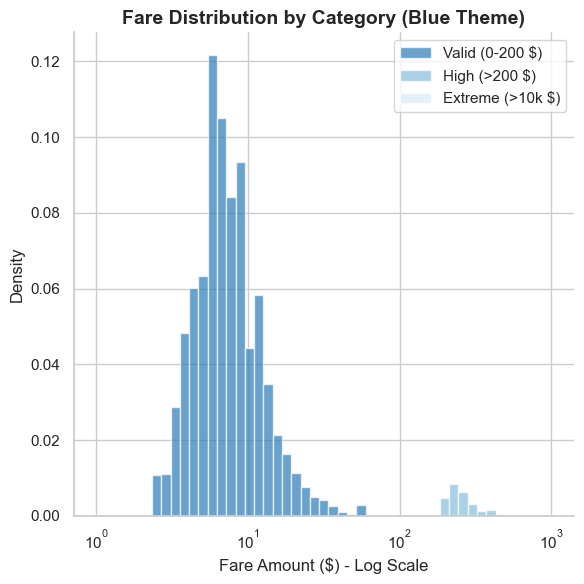

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Paths
path = r"F:\project"
raw_file = os.path.join(path, "nyc_taxi_merged.parquet")

# Load minimal columns
use_cols = ["fare_amount"]
df = pd.read_parquet(raw_file, columns=use_cols, engine="pyarrow")

print("=== RAW DATA STATISTICS ===")
print(f"Total trips: {len(df):,}")
print(f"Max fare: {df['fare_amount'].max()}")
print(f"Min fare: {df['fare_amount'].min()}")

# Define fare categories
def categorize_fare(fare):
    if fare < 0:
        return 'Negative Outliers'
    elif fare == 0:
        return 'Zero Fares'
    elif 0 < fare <= 200:
        return 'Valid Fares (0-200)'
    elif 200 < fare <= 10000:
        return 'High Outliers (>200)'
    else:
        return 'Extreme (>10,000)'

# Apply categorization
df['fare_category'] = df['fare_amount'].apply(categorize_fare)

# Count each category with percentages
fare_counts = df['fare_category'].value_counts()
fare_percentages = (fare_counts / len(df)) * 100

print("\n=== Fare Category Counts & Percentages ===")
for category, count in fare_counts.items():
    print(f"{category:20s} : {count:10,d}  ({fare_percentages[category]:.2f}%)")

# Histogram 
# Log-scale bins for fares
bins = np.logspace(0, 3, 50)  

# Separate fare categories
valid_fares = df['fare_amount'][(df['fare_amount'] > 0) & (df['fare_amount'] <= 200)].dropna()
high_fares = df['fare_amount'][(df['fare_amount'] > 200) & (df['fare_amount'] <= 10000)].dropna()
extreme_fares = df['fare_amount'][df['fare_amount'] > 10000].dropna()

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(valid_fares, bins=bins, alpha=0.7, color=sns.color_palette("Blues")[4], 
        label='Valid (0-200 $)', density=True)
ax.hist(high_fares, bins=bins, alpha=0.7, color=sns.color_palette("Blues")[2], 
        label='High (>200 $)', density=True)
ax.hist(extreme_fares, bins=bins, alpha=0.7, color=sns.color_palette("Blues")[0], 
        label='Extreme (>10k $)', density=True)

ax.set_xscale('log')
ax.set_xlabel('Fare Amount ($) - Log Scale')
ax.set_ylabel('Density')
ax.set_title('Fare Distribution by Category (Blue Theme)', fontsize=14, weight='bold')
ax.legend()

sns.despine()
plt.tight_layout()
plt.show()

## Fare Data Insights
- **Max fare:** $429,496.72 (≈ $430K)
- **Data quality:** 99.93% of fares are valid. Tiny fractions are negative, zero, or outliers, which should be cleaned for accurate analysis.


> ### 4.2 Trip Distance Distribution Analysis
- Analyzing trip distance patterns to identify geographical outliers.

=== RAW DATA STATISTICS ===
Total trips: 34,499,859
Max distance: 19072628.80 miles
Min distance: -3390583.80 miles

=== Distance Category Counts & Percentages ===
Valid Distances (0-50 mi) : 34,295,546  (99.41%)
Zero Distance             :    202,875  (0.59%)
High Outliers (>50 mi)    :      1,375  (0.00%)
Extreme (>500 mi)         :         62  (0.00%)
Negative Outliers         :          1  (0.00%)


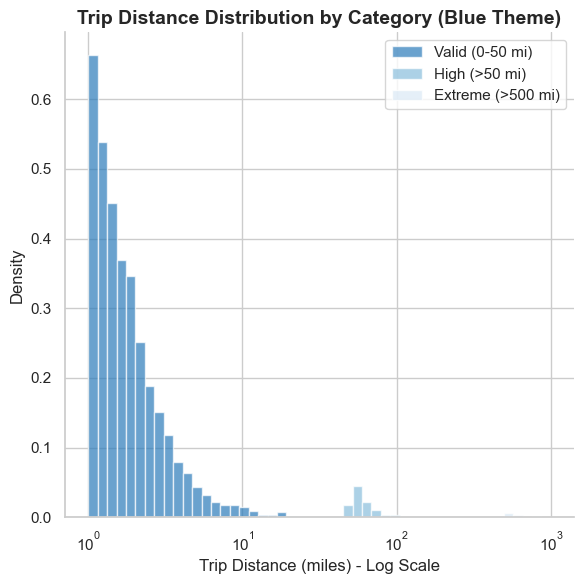

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Paths
path = r"F:\project"
raw_file = os.path.join(path, "nyc_taxi_merged.parquet")

# Load minimal columns
use_cols = ["trip_distance"]
df = pd.read_parquet(raw_file, columns=use_cols, engine="pyarrow")

print("=== RAW DATA STATISTICS ===")
print(f"Total trips: {len(df):,}")
print(f"Max distance: {df['trip_distance'].max():.2f} miles")
print(f"Min distance: {df['trip_distance'].min():.2f} miles")

# Define distance categories
def categorize_distance(distance):
    if distance < 0:
        return 'Negative Outliers'
    elif distance == 0:
        return 'Zero Distance'
    elif 0 < distance <= 50:
        return 'Valid Distances (0-50 mi)'
    elif 50 < distance <= 500:
        return 'High Outliers (>50 mi)'
    else:
        return 'Extreme (>500 mi)'

# Apply categorization
df['distance_category'] = df['trip_distance'].apply(categorize_distance)

# Count each category with percentages
distance_counts = df['distance_category'].value_counts()
distance_percentages = (distance_counts / len(df)) * 100

print("\n=== Distance Category Counts & Percentages ===")
for category, count in distance_counts.items():
    print(f"{category:25s} : {count:10,d}  ({distance_percentages[category]:.2f}%)")

# Histogram 
# Log-scale bins for distance
bins = np.logspace(0, 3, 50)  # from 1 to 1000 miles

# Separate distance categories
valid_distances = df['trip_distance'][(df['trip_distance'] > 0) & (df['trip_distance'] <= 50)].dropna()
high_distances = df['trip_distance'][(df['trip_distance'] > 50) & (df['trip_distance'] <= 500)].dropna()
extreme_distances = df['trip_distance'][df['trip_distance'] > 500].dropna()

# Plot
fig, ax = plt.subplots(figsize=(6, 6))

ax.hist(valid_distances, bins=bins, alpha=0.7, color=sns.color_palette("Blues")[4], 
        label='Valid (0-50 mi)', density=True)
ax.hist(high_distances, bins=bins, alpha=0.7, color=sns.color_palette("Blues")[2], 
        label='High (>50 mi)', density=True)
ax.hist(extreme_distances, bins=bins, alpha=0.7, color=sns.color_palette("Blues")[0], 
        label='Extreme (>500 mi)', density=True)

ax.set_xscale('log')
ax.set_xlabel('Trip Distance (miles) - Log Scale')
ax.set_ylabel('Density')
ax.set_title('Trip Distance Distribution by Category (Blue Theme)', fontsize=14, weight='bold')
ax.legend()

sns.despine()
plt.tight_layout()
plt.show()


## Distance Data Insights
- **Max distance:** 19 million miles
- **Data quality:** 99.41% of trips have valid distances. Zero, negative and outliers are rare and should be cleaned for accuracy.


> ### 4.3 Trip Duration Analysis
- Calculating and analyzing trip duration patterns.

=== RAW DATA STATISTICS ===
Total trips: 34,499,859
Max duration: 192313.38 minutes
Min duration: -537100.07 minutes
Average duration: 15.50 minutes

=== Duration Category Counts & Percentages ===
Valid Duration (0-120 min) : 34,408,114  (99.73%)
Extreme (>600 min)        :     49,998  (0.14%)
Zero Duration             :     36,091  (0.10%)
High Outliers (>120 min)  :      5,480  (0.02%)
Invalid Duration          :        176  (0.00%)


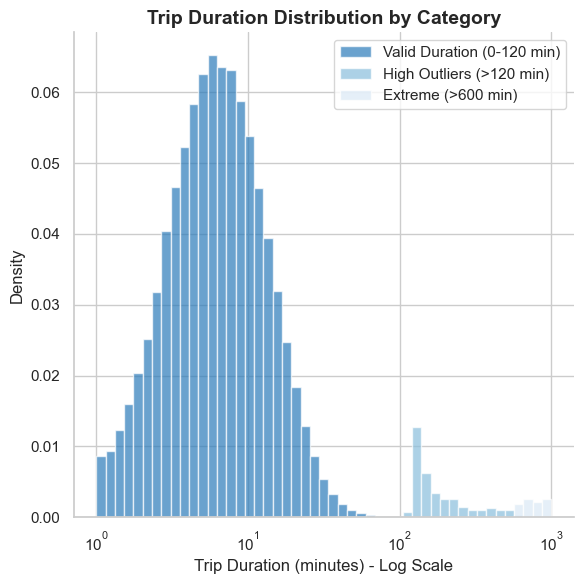

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Paths
path = r"F:\project"
raw_file = os.path.join(path, "nyc_taxi_merged.parquet")

# Load necessary columns
use_cols = ["tpep_pickup_datetime", "tpep_dropoff_datetime"]
df = pd.read_parquet(raw_file, columns=use_cols, engine="pyarrow")

# Convert to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

print("=== RAW DATA STATISTICS ===")
print(f"Total trips: {len(df):,}")
print(f"Max duration: {df['trip_duration_min'].max():.2f} minutes")
print(f"Min duration: {df['trip_duration_min'].min():.2f} minutes")
print(f"Average duration: {df['trip_duration_min'].mean():.2f} minutes")

# Define duration categories
def categorize_duration(duration):
    if duration < 0:
        return 'Invalid Duration'
    elif duration == 0:
        return 'Zero Duration'
    elif 0 < duration <= 120:  # 0–2 hours
        return 'Valid Duration (0-120 min)'
    elif 120 < duration <= 600:  # 2–10 hours
        return 'High Outliers (>120 min)'
    else:
        return 'Extreme (>600 min)'

df['duration_category'] = df['trip_duration_min'].apply(categorize_duration)

# Count categories and percentages
duration_counts = df['duration_category'].value_counts()
duration_percentages = (duration_counts / len(df)) * 100

print("\n=== Duration Category Counts & Percentages ===")
for category, count in duration_counts.items():
    print(f"{category:25s} : {count:10,d}  ({duration_percentages[category]:.2f}%)")


colors = {
    'Valid Duration (0-120 min)': sns.color_palette("Blues")[4], 
    'High Outliers (>120 min)': sns.color_palette("Blues")[2],
    'Extreme (>600 min)': sns.color_palette("Blues")[0]
}

# Plot histogram
fig, ax = plt.subplots(figsize=(6, 6))

for category, color in colors.items():
    durations = df['trip_duration_min'][df['duration_category'] == category].dropna()
    ax.hist(durations, bins=np.logspace(0, 3, 50), alpha=0.7, color=color, label=category, density=True)

ax.set_xscale('log')
ax.set_xlabel('Trip Duration (minutes) - Log Scale')
ax.set_ylabel('Density')
ax.set_title('Trip Duration Distribution by Category', fontsize=14, weight='bold')
ax.legend()
 
sns.despine()
plt.tight_layout()
plt.show()


> Duration Data Insights
> Most trips `99.73%` have `valid` durations. Zero, extreme, high, and negative values are rare and should be cleaned.

> ## NYC Taxi Data: Invalid Entries & Outliers


In [ ]:
import pandas as pd

# Load cleaned parquet data 
path = r"F:\project\nyc_taxi_merged.parquet"
columns = [
    "trip_distance", "tpep_pickup_datetime", "tpep_dropoff_datetime",
    "fare_amount", "tolls_amount", "extra", "tip_amount", "mta_tax", "passenger_count"
]

df = pd.read_parquet(path, columns=columns)

#  Convert columns to appropriate types 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

numeric_cols = ["trip_distance", "fare_amount", "tolls_amount", "extra", "tip_amount", "mta_tax", "passenger_count"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric to NaN

#  Calculate trip duration in minutes 
df['trip_duration_min'] = (
    (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
)

# Total trips 
total_trips = len(df)

#  Quality Checks
greater_100_miles = (df["trip_distance"] > 100).sum()
less_equal_0_miles = (df["trip_distance"] <= 0).sum()

greater_300_min = (df["trip_duration_min"] > 300).sum()
less_equal_0_min = (df["trip_duration_min"] <= 0).sum()

greater_100_dollar = (df["fare_amount"] > 100).sum()
fare_less_equal_0 = (df["fare_amount"] <= 0).sum()

tip_greater_50 = (df["tip_amount"] > 50).sum()
tip_less_0 = (df["tip_amount"] < 0).sum()

tolls_greater_50 = (df["tolls_amount"] > 50).sum()
tolls_less_0 = (df["tolls_amount"] < 0).sum()

extra_greater_10 = (df["extra"] > 10).sum()
extra_less_0 = (df["extra"] < 0).sum()

mta_greater_5 = (df["mta_tax"] > 5).sum()
mta_less_0 = (df["mta_tax"] < 0).sum()

passenger_lt_1 = (df["passenger_count"] < 1).sum()
passenger_gt_6 = (df["passenger_count"] > 6).sum()

# Print Data Quality Report
print("=== NYC TAXI DATA QUALITY REPORT ===\n")
print(f"Total Trips Analyzed : {total_trips:,}\n")

print("Trips by Distance (Threshold: 100 miles)")
print(f"  > 100 miles        : {greater_100_miles:,} ({greater_100_miles/total_trips*100:.2f}%)")
print(f"  <= 0 miles         : {less_equal_0_miles:,} ({less_equal_0_miles/total_trips*100:.2f}%)\n")

print("Trips by Duration (Threshold: 300 minutes)")
print(f"  > 300 minutes      : {greater_300_min:,} ({greater_300_min/total_trips*100:.2f}%)")
print(f"  <= 0 minutes       : {less_equal_0_min:,} ({less_equal_0_min/total_trips*100:.2f}%)\n")

print("Trips by Fare (Threshold: 100 $)")
print(f"  Fare > 100         : {greater_100_dollar:,} ({greater_100_dollar/total_trips*100:.2f}%)")
print(f"  Fare <= 0          : {fare_less_equal_0:,} ({fare_less_equal_0/total_trips*100:.2f}%)\n")

print("Trips by Tip (Threshold: 50 $)")
print(f"  Tip > 50 $        : {tip_greater_50:,} ({tip_greater_50/total_trips*100:.2f}%)")
print(f"  Tip < 0            : {tip_less_0:,} ({tip_less_0/total_trips*100:.2f}%)\n")

print("Trips by Toll (Threshold: 50 $)")
print(f"  Tolls > 50 $      : {tolls_greater_50:,} ({tolls_greater_50/total_trips*100:.2f}%)")
print(f"  Tolls < 0          : {tolls_less_0:,} ({tolls_less_0/total_trips*100:.2f}%)\n")

print("Invalid / Unusual Charges")
print(f"  Extra < 0          : {extra_less_0:,} ({extra_less_0/total_trips*100:.2f}%)")
print(f"  Extra > 10         : {extra_greater_10:,} ({extra_greater_10/total_trips*100:.2f}%)")
print(f"  MTA Tax < 0        : {mta_less_0:,} ({mta_less_0/total_trips*100:.2f}%)")
print(f"  MTA Tax > 5        : {mta_greater_5:,} ({mta_greater_5/total_trips*100:.2f}%)\n")

print("Passenger Count Issues")
print(f"  < 1 passenger      : {passenger_lt_1:,} ({passenger_lt_1/total_trips*100:.2f}%)")
print(f"  > 6 passengers     : {passenger_gt_6:,} ({passenger_gt_6/total_trips*100:.2f}%)")


=== NYC TAXI DATA QUALITY REPORT ===

Total Trips Analyzed : 34,499,859

Trips by Distance (Threshold: 100 miles)
  > 100 miles        : 285 (0.00%)
  <= 0 miles         : 202,876 (0.59%)

Trips by Duration (Threshold: 300 minutes)
  > 300 minutes      : 51,742 (0.15%)
  <= 0 minutes       : 36,267 (0.11%)

Trips by Fare (Threshold: 100 $)
  Fare > 100         : 19,247 (0.06%)
  Fare <= 0          : 23,378 (0.07%)

Trips by Tip (Threshold: 50 $)
  Tip > 50 $        : 2,638 (0.01%)
  Tip < 0            : 341 (0.00%)

Trips by Toll (Threshold: 50 $)
  Tolls > 50 $      : 421 (0.00%)
  Tolls < 0          : 80 (0.00%)

Invalid / Unusual Charges
  Extra < 0          : 6,283 (0.02%)
  Extra > 10         : 21 (0.00%)
  MTA Tax < 0        : 12,695 (0.04%)
  MTA Tax > 5        : 21 (0.00%)

Passenger Count Issues
  < 1 passenger      : 1,649 (0.00%)
  > 6 passengers     : 197 (0.00%)


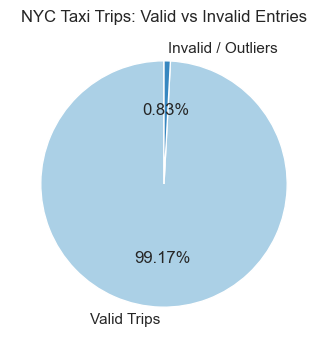

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load cleaned parquet data
path = r"F:\project\nyc_taxi_merged.parquet"
columns = [
    "trip_distance", "tpep_pickup_datetime", "tpep_dropoff_datetime",
    "fare_amount", "tolls_amount", "extra", "tip_amount", "mta_tax", "passenger_count"
]

df = pd.read_parquet(path, columns=columns)

# Convert to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate trip duration in minutes
df['trip_duration_min'] = (
    (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
)

# === Define invalid conditions using intermediate variables ===
cond_distance = (df["trip_distance"] <= 0) | (df["trip_distance"] > 100)
cond_duration = (df["trip_duration_min"] <= 0) | (df["trip_duration_min"] > 300)
cond_fare = (df["fare_amount"] <= 0) | (df["fare_amount"] > 100)
cond_tolls = (df["tolls_amount"] < 0) | (df["tolls_amount"] > 50)
cond_extra = (df["extra"] < 0) | (df["extra"] > 10)
cond_tip = (df["tip_amount"] < 0) | (df["tip_amount"] > 50)
cond_mta = (df["mta_tax"] < 0) | (df["mta_tax"] > 5)
cond_time = (df["tpep_dropoff_datetime"] <= df["tpep_pickup_datetime"])
cond_passenger = (df["passenger_count"] < 1) | (df["passenger_count"] > 6)

# Combine all invalid conditions
invalid_conditions = (
    cond_distance | cond_duration | cond_fare | cond_tolls |
    cond_extra | cond_tip | cond_mta | cond_time | cond_passenger
)

# Count valid and invalid trips
valid_count = (~invalid_conditions).sum()
invalid_count = invalid_conditions.sum()
total_trips = len(df)

# === Prepare data for visualization ===
counts = [valid_count, invalid_count]
labels = ["Valid Trips", "Invalid / Outliers"]

# === Plot valid vs invalid trips ===
plt.figure(figsize=(4,4))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.2f%%',
    startangle=90,
    colors=sns.color_palette("Blues", n_colors=2)
)
plt.title("NYC Taxi Trips: Valid vs Invalid Entries")
plt.show()

> ## Median Before Data Cleaning

In [ ]:
import pandas as pd

path = r"F:\project\nyc_taxi_merged.parquet"
use_cols = [
    "fare_amount", "trip_distance", "tpep_dropoff_datetime", "tpep_pickup_datetime",
    "extra", "mta_tax", "tolls_amount", "tip_amount"
]
df = pd.read_parquet(path, columns=use_cols)

# Trip duration
df["duration_min"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Compute median only
median_values = df.median(numeric_only=True)
print(median_values.round(2))


fare_amount       9.00
trip_distance     1.69
extra             0.00
mta_tax           0.50
tolls_amount      0.00
tip_amount        1.32
duration_min     10.65
dtype: float64


> ## Median Values Across Cleaned Dataset
- Fare Amount: `$9.00` → typical NYC taxi fare
- Trip Distance: `1.69 miles` → short urban trips
- Duration: `10.66 minutes` → quick city rides
- MTA Tax: `$0.50` → fixed surcharge
- Extra: `$0.00` → most trips have no extra
- Tolls Amount: `$0.00` → majority of trips have no tolls
- Tip Amount: `$1.32` → common gratuity
- `Note:` Medians are for reference only

> ## 5. Data Cleaning Pipeline

In [21]:
import os
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import duckdb

# Paths
input_path = r"F:\project"
input_file = os.path.join(input_path, "nyc_taxi_merged.parquet")

output_path = r"F:\project"
os.makedirs(output_path, exist_ok=True)
output_file = os.path.join(output_path, "nyc_taxi_final.parquet")

# Read parquet metadata
parquet = pq.ParquetFile(input_file)
print(f"Found {parquet.num_row_groups} row groups")

writer = None
total_rows = 0
kept_rows = 0

# Process row groups
for i in range(parquet.num_row_groups):
    print(f"Processing row group {i+1}/{parquet.num_row_groups} ...")

    # Load one row group at a time
    table = parquet.read_row_group(i)
    df = table.to_pandas()
    total_rows += len(df)

    # Derived feature: trip duration
    df["duration_min"] = (
        (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"])
        .dt.total_seconds() / 60
    )

 # Cleaning rules
    df_clean = df[
    (df["trip_distance"] > 0) & (df["trip_distance"] < 100) &
    (df["fare_amount"] > 0) & (df["fare_amount"] < 100) &
    (df["duration_min"] > 0) & (df["duration_min"] < 300) &
    (df["tpep_dropoff_datetime"] > df["tpep_pickup_datetime"]) &
    (df["tolls_amount"] >= 0) & (df["tolls_amount"] <= 50) &
    (df["tip_amount"] >= 0) & (df["tip_amount"] <= 50) &
    (df["mta_tax"] >= 0) & (df["mta_tax"] <= 5) &
    (df["extra"] >=0 ) & (df["extra"] <= 10) 
    ].copy()




    if "passenger_count" in df_clean.columns:
        df_clean = df_clean[(df_clean["passenger_count"] > 0) & (df_clean["passenger_count"] <= 6)]

    # Drop duplicates
    df_clean = df_clean.drop_duplicates()
    kept_rows += len(df_clean)

    # Write cleaned chunk
    if not df_clean.empty:
        table_clean = pa.Table.from_pandas(df_clean, preserve_index=False)
        if writer is None:
            writer = pq.ParquetWriter(output_file, table_clean.schema, compression="snappy")
        writer.write_table(table_clean)

# Finalize writer
if writer:
    writer.close()
    print(f"\n Final cleaned parquet saved to: {output_file}")
    print(f"Original rows: {total_rows:,}")
    print(f"Kept rows after cleaning: {kept_rows:,}")
    print(f"Removed rows: {total_rows - kept_rows:,}")
else:
    print(" No valid rows found, file not created.")

# Compute exact medians with DuckDB
print("\n=== Final Median Values Across Cleaned Dataset ===")
con = duckdb.connect()
target_cols = ["fare_amount", "trip_distance", "tip_amount", 
               "extra", "tolls_amount", "mta_tax", "duration_min"]

for col in target_cols:
    val = con.execute(
        f"SELECT quantile_cont({col}, 0.5) FROM parquet_scan('{output_file}') WHERE {col} IS NOT NULL"
    ).fetchone()[0]
    print(f"{col}: {val:.2f}")

con.close()

Found 70 row groups
Processing row group 1/70 ...
Processing row group 2/70 ...
Processing row group 3/70 ...
Processing row group 4/70 ...
Processing row group 5/70 ...
Processing row group 6/70 ...
Processing row group 7/70 ...
Processing row group 8/70 ...
Processing row group 9/70 ...
Processing row group 10/70 ...
Processing row group 11/70 ...
Processing row group 12/70 ...
Processing row group 13/70 ...
Processing row group 14/70 ...
Processing row group 15/70 ...
Processing row group 16/70 ...
Processing row group 17/70 ...
Processing row group 18/70 ...
Processing row group 19/70 ...
Processing row group 20/70 ...
Processing row group 21/70 ...
Processing row group 22/70 ...
Processing row group 23/70 ...
Processing row group 24/70 ...
Processing row group 25/70 ...
Processing row group 26/70 ...
Processing row group 27/70 ...
Processing row group 28/70 ...
Processing row group 29/70 ...
Processing row group 30/70 ...
Processing row group 31/70 ...
Processing row group 32/70 .

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

trip_distance: 1.70
tip_amount: 1.35
extra: 0.00
tolls_amount: 0.00
mta_tax: 0.50
duration_min: 10.68


## Data Cleaning Summary

> ## Initial Data Cleaning
- Removed records with invalid or extreme values:
  - Non-positive or extremely high `fare_amount` or `trip_distance`
  - Invalid timestamps (`dropoff ≤ pickup`)
  - Negative values in monetary fields (`tip_amount`, `tolls_amount`, `extra`, `mta_tax`)
  - Non-positive `duration_min` or extremely long trips (>5 hours)
  - Duplicate rows
  - Trips with `passenger_count ≤ 0` (if the column exists)
- Preserved only valid trips in a cleaned parquet file
- `Results:`
  - Original rows: 34,499,859 (~34.5M)
  - Rows kept: 34,210,167 (~34.2M). Valid Rows `99.2%`
  - Rows removed: 289,692. Invalid Rows `0.8%`
> `Insight:` 
- The majority of data was valid, with a small fraction removed to improve data quality.
- Dataset is now cleaned and ready for accurate analysis.



> ## Descriptive & Exploratory Analysis

Row count: 34,210,167
Average fare amount (per trip): 12.43
Average distance (per trip): 2.91
Average trip duration (minutes per trip): 13.37
Average fare per mile: 4.28
Average trip speed (mph): 13.04

   Absolute Count  Relative %
1        24323943       71.10
2         4868999       14.23
3         1374435        4.02
4          653438        1.91
5         1842589        5.39
6         1146763        3.35


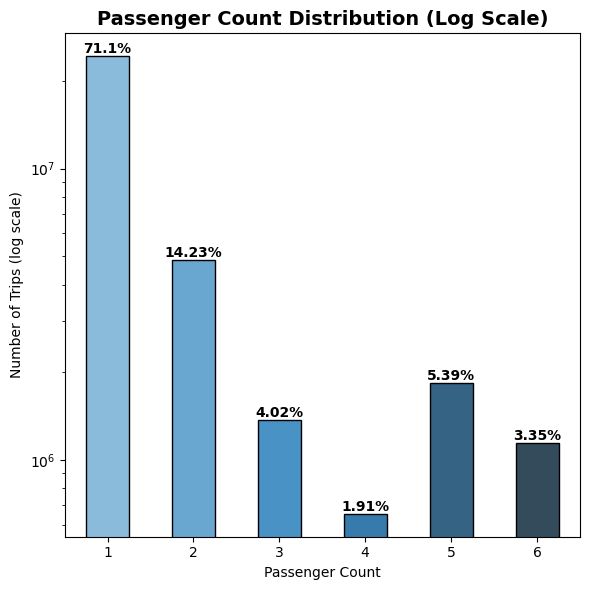

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. File path
path = r"F:\project\nyc_taxi_final.parquet"

# 2. Open parquet file
parquet_file = pq.ParquetFile(path)

# 3. Columns needed
columns_to_read = ["fare_amount", "trip_distance", "duration_min", "passenger_count"]

# Initialize trackers
total_fare = total_distance = total_duration = total_rows = 0
passenger_distribution = {}

# 4. Process in batches
for batch in parquet_file.iter_batches(batch_size=500_000, columns=columns_to_read):
    df = batch.to_pandas()

    # Update sums
    total_fare += df["fare_amount"].sum()
    total_distance += df["trip_distance"].sum()
    total_duration += df["duration_min"].sum()
    total_rows += len(df)

    # Passenger distribution (count values)
    counts = df["passenger_count"].value_counts().to_dict()
    for k, v in counts.items():
        passenger_distribution[k] = passenger_distribution.get(k, 0) + v

# 5. Compute averages (aggregate level)
avg_fare = total_fare / total_rows
avg_distance = total_distance / total_rows
avg_duration = total_duration / total_rows
avg_fare_per_mile = total_fare / total_distance
avg_speed = total_distance / (total_duration / 60)   # mph

# 6. Trip-level statistics
print(f"Row count: {total_rows:,}")
print(f"Average fare amount (per trip): {avg_fare:.2f}")
print(f"Average distance (per trip): {avg_distance:.2f}")
print(f"Average trip duration (minutes per trip): {avg_duration:.2f}")
print(f"Average fare per mile: {avg_fare_per_mile:.2f}")
print(f"Average trip speed (mph): {avg_speed:.2f}\n")

# 7. Passenger count summary 
abs_counts = pd.Series(passenger_distribution).sort_index()
rel_counts = (abs_counts / total_rows * 100).round(2)

summary = pd.DataFrame({
    "Absolute Count": abs_counts,
    "Relative %": rel_counts
})

print(summary)

# Plot 
plt.figure(figsize=(6,6))
ax = summary["Absolute Count"].plot(
    kind="bar",
    color=sns.color_palette("Blues_d", len(summary)),  
    edgecolor="black"
)

plt.yscale("log")
plt.title("Passenger Count Distribution (Log Scale)", fontsize=14, weight="bold")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips (log scale)")
plt.xticks(rotation=0)


for i, (count, pct) in enumerate(zip(summary["Absolute Count"], summary["Relative %"])):
    ax.text(
        i, count, f"{pct}%", 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.show()


## Trip-Level Summary and Passenger Behavior

> ## Overall Trip Profile
- We analyzed `~34.2 million taxi trips` after cleaning outliers. The `average trip` was:
- `2.91 miles` long
- `13.37 minutes` in duration
- Costing around `$12.43` per ride
- This translates to an average speed of `~13.0 mph`, reflecting typical city traffic conditions.

> ## Pricing Efficiency
- On average, fares amount to `$4.28 per mile`, consistent with NYC’s fare rules and surcharges.
- The pricing model appears distance-driven rather than time-driven, meaning congestion affects trip duration but does not overly inflate the fare.

> ## Passenger Behavior
- The majority of rides `(71%)` carried a single passenger, emphasizing taxis as a solo commuting mode in NYC.
- Two-passenger trips accounted for `14%`, while groups of 3–5 passengers made up about 11%.
- Rare cases of 6 passengers `(~3%)` were also recorded, likely large group or airport trips.

> **Insights**
- Short, affordable solo trips dominate the market. The typical NYC taxi customer is traveling alone for short distances.
- Moderate traffic speeds (~13 mph) are visible in the average trip speed, consistent with real-world NYC driving conditions.
- Fare per mile is stable at ~$4.3, showing reliability in pricing.
- Group rides are less common but still significant (~15%), reflecting airport runs, tourism, or shared trips.

> ## Vendor Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Path to your cleaned dataset
path = r"F:\project\nyc_taxi_final.parquet"
# Read only the columns we need
use_cols = ["vendorid", "fare_amount", "tip_amount", "total_amount", "trip_distance"]
df = pd.read_parquet(path, columns=use_cols)

# Map Vendor IDs to provider names
vendor_map = {1: "Creative Mobile Technologies", 2: "VeriFone Inc."}
df['vendor_name'] = df['vendorid'].map(vendor_map)

# Group by vendor and calculate summary statistics
vendor_summary = df.groupby('vendor_name').agg(
    trips=('vendorid', 'count'),
    avg_fare=('fare_amount', 'mean'),
    avg_tip=('tip_amount', 'mean'),
    avg_distance=('trip_distance', 'mean'),
    total_revenue=('total_amount', 'sum')
).reset_index()

vendor_summary




,vendor_name,trips,avg_fare,avg_tip,avg_distance,total_revenue
0,Creative Mobile Technologies,15987523,12.315723,1.734490,2.845955,2.471777e+08
1,VeriFone Inc.,18222644,12.538247,1.780748,2.957668,2.870216e+08


C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\4134481442.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,0], x='vendor_name', y='trips',
C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\4134481442.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,1], x='vendor_name', y='avg_fare',
C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\4134481442.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1,0], x='vendor_name', y='avg_distance',
C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\4134481442.py:64: Futur

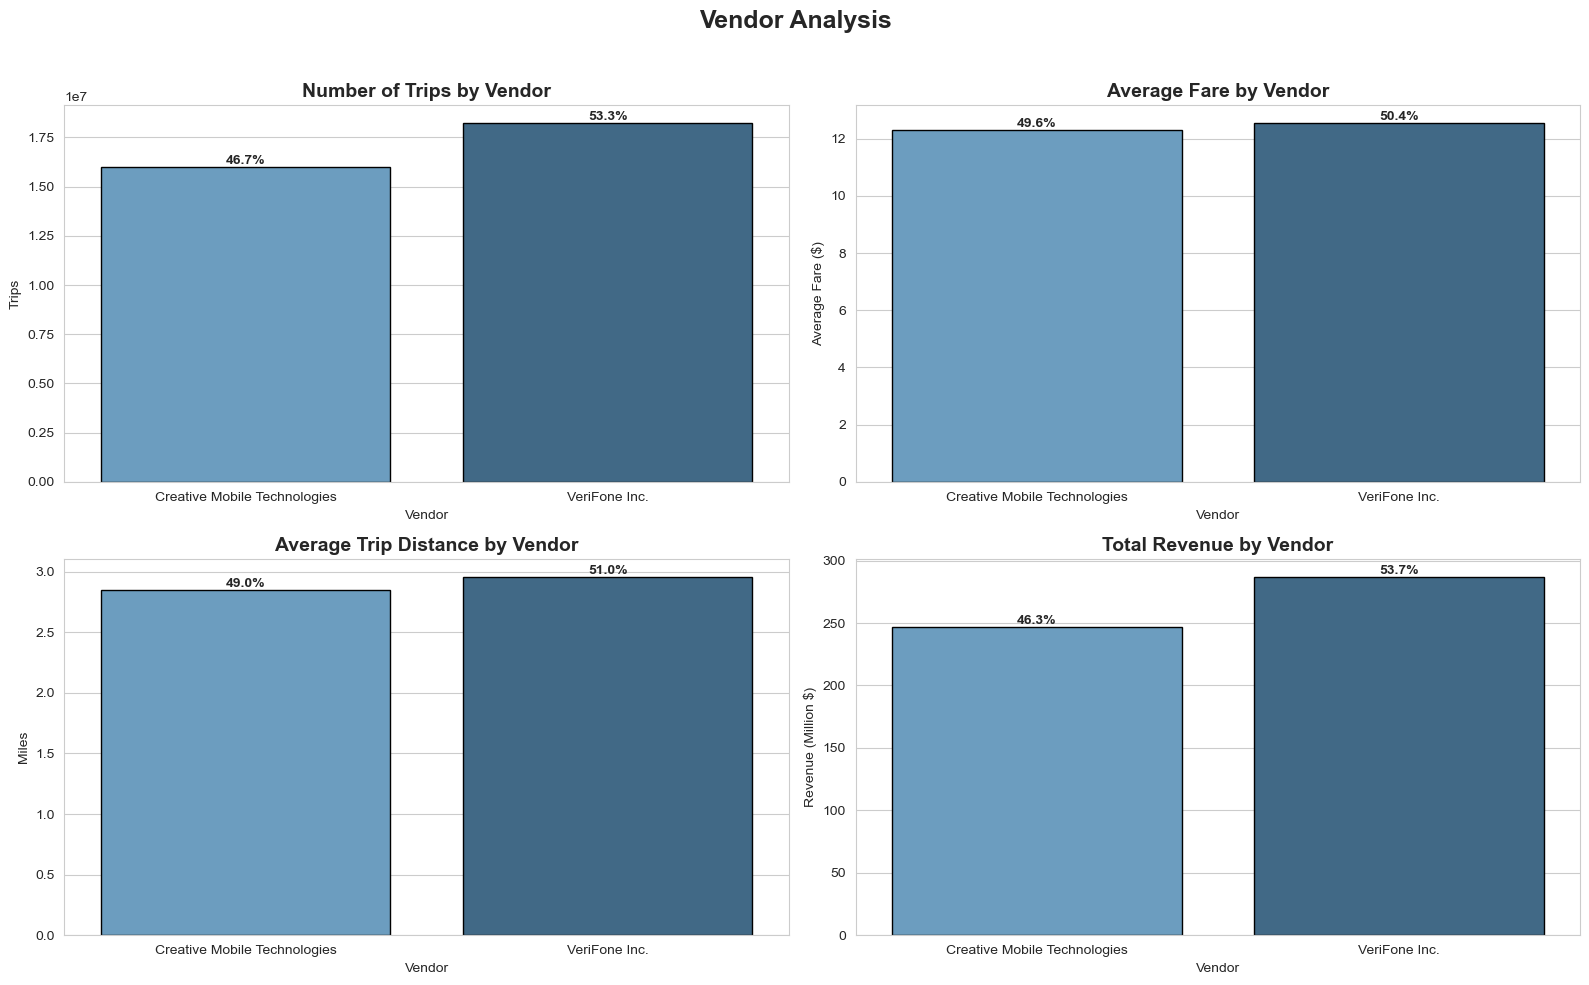

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for a dashboard look
sns.set_style("whitegrid")

# Create figure with 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Common styling for titles
title_style = {'fontsize': 14, 'fontweight': 'bold'}

# 1. Number of Trips (with % on bars)
total_trips = vendor_summary['trips'].sum()
sns.barplot(ax=axes[0,0], x='vendor_name', y='trips', 

            data=vendor_summary, palette="Blues_d", edgecolor="black")
axes[0,0].set_title("Number of Trips by Vendor", **title_style)
axes[0,0].set_ylabel("Trips")
axes[0,0].set_xlabel("Vendor")

for p in axes[0,0].patches:
    height = p.get_height()
    pct = height / total_trips * 100
    axes[0,0].text(
        p.get_x() + p.get_width()/2, height, f'{pct:.1f}%', 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# 2. Average Fare (as % of total average fares)
total_avg_fare = vendor_summary['avg_fare'].sum()
sns.barplot(ax=axes[0,1], x='vendor_name', y='avg_fare', 
            data=vendor_summary, palette="Blues_d", edgecolor="black")
axes[0,1].set_title("Average Fare by Vendor", **title_style)
axes[0,1].set_ylabel("Average Fare ($)")
axes[0,1].set_xlabel("Vendor")

for p in axes[0,1].patches:
    height = p.get_height()
    pct = height / total_avg_fare * 100
    axes[0,1].text(
        p.get_x() + p.get_width()/2, height, f'{pct:.1f}%', 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# 3. Average Trip Distance (as % of total distance)
total_avg_distance = vendor_summary['avg_distance'].sum()
sns.barplot(ax=axes[1,0], x='vendor_name', y='avg_distance', 
            data=vendor_summary, palette="Blues_d", edgecolor="black")
axes[1,0].set_title("Average Trip Distance by Vendor", **title_style)
axes[1,0].set_ylabel("Miles")
axes[1,0].set_xlabel("Vendor")

for p in axes[1,0].patches:
    height = p.get_height()
    pct = height / total_avg_distance * 100
    axes[1,0].text(
        p.get_x() + p.get_width()/2, height, f'{pct:.1f}%', 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# 4. Total Revenue (in Millions, % of total revenue)
total_revenue = vendor_summary['total_revenue'].sum()
sns.barplot(ax=axes[1,1], x='vendor_name', y=vendor_summary['total_revenue'] / 1e6, 
            data=vendor_summary, palette="Blues_d", edgecolor="black")
axes[1,1].set_title("Total Revenue by Vendor", **title_style)
axes[1,1].set_ylabel("Revenue (Million $)")
axes[1,1].set_xlabel("Vendor")

for p in axes[1,1].patches:
    height = p.get_height()
    pct = (height * 1e6) / total_revenue * 100  # convert back to original value
    axes[1,1].text(
        p.get_x() + p.get_width()/2, height, f'{pct:.1f}%', 
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Main dashboard title
fig.suptitle("Vendor Analysis", fontsize=18, fontweight="bold")

# Adjust spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Vendor Analysis Insights

- **VeriFone Inc.** emerges as the leading vendor, handling about **18.2 million rides**, compared to **16.0 million** for Creative Mobile Technologies (CMT).  
- **Average fares and tips** are very similar between the two, but **trip distance differs slightly**:  
  - CMT averages **2.85 miles** per trip.  
  - VeriFone averages **2.96 miles** per trip.  
- The real differentiator is **volume**: VeriFone captures more revenue not because its rides cost more, but because it completes **millions more trips**.  

> ## **Takeaway:** In New York City, it’s not how far you drive, but how many rides you take that counts.
- VeriFone captures more total revenue because it serves more rides, not because its trips are significantly longer or more expensive.
- CMT has slightly shorter total revenue due to lower trip volume, despite similar fares and tips.

> ## Correlation Analysis of Key Taxi Trip Variables

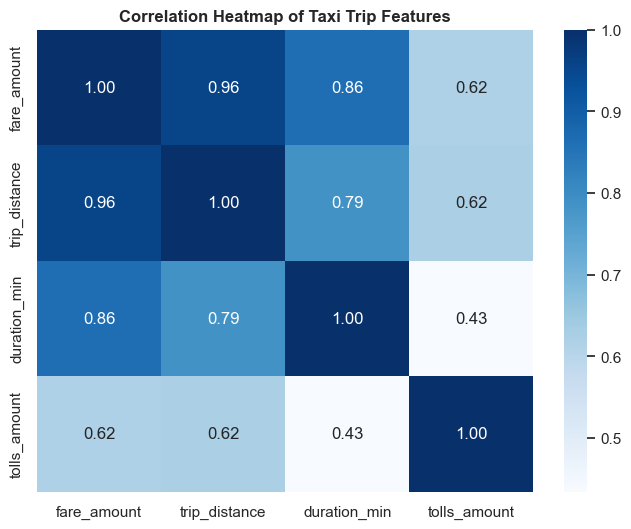

In [27]:
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path
path = r"F:\project\nyc_taxi_final.parquet"
columns = ["fare_amount", "trip_distance", "duration_min", "tolls_amount"]

# Open parquet file
parquet_file = pq.ParquetFile(path)

# Initialize lists for batches
data_arrays = {col: [] for col in columns}

# Read in batches and store as NumPy arrays
for batch in parquet_file.iter_batches(batch_size=500_000, columns=columns):
    df = batch.to_pandas()
    for col in columns:
        data_arrays[col].append(df[col].values)

# Concatenate arrays for each column
for col in columns:
    data_arrays[col] = np.concatenate(data_arrays[col])

# Stack arrays to compute correlation matrix
data_matrix = np.stack([data_arrays[col] for col in columns], axis=0)
corr_matrix = np.corrcoef(data_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=columns, yticklabels=columns)
plt.title("Correlation Heatmap of Taxi Trip Features", fontweight="bold")
plt.show()


> ## What Factors Really Affect NYC Taxi Fares?

> ## Fare Amount & Trip Distance Correlation
- Shows a very strong positive correlation (`0.96`), confirming that longer trips naturally cost more.
- Distance is the main driver of fare in NYC taxis.

> ## Duration & Fare Amount Correlation
- Also strongly positively correlated (`0.86`), reflecting that longer trips in time also cost more.

> ## Duration & Trip Distance Correlation
- Strong correlation observed (`0.79`), indicating that longer trips generally take more time.

> ## Tolls & Trip Characteristics
- Tolls have moderate correlations with fare (`0.62`), trip distance (`0.62`), and duration (`0.43`), highlighting that tolled trips tend to be longer, more time-consuming, and more expensive.

> **Insight:** Fare amounts in NYC taxis are driven mainly by trip distance, with duration and tolls playing secondary roles. This shows that the pricing system prioritizes distance while reflecting the additional cost of time and tolls for longer trips.


> ## Time-Based Analysis of Taxi Trip Data

C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\4249707413.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, x=trip_count_by_month.index.astype(str), y=trip_count_by_month.values, palette="Blues_d")
C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\4249707413.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax2, x=trip_count_by_day.index, y=trip_count_by_day.values, palette="Blues_d")
C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\4249707413.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax3, x=avg_duration_by_da

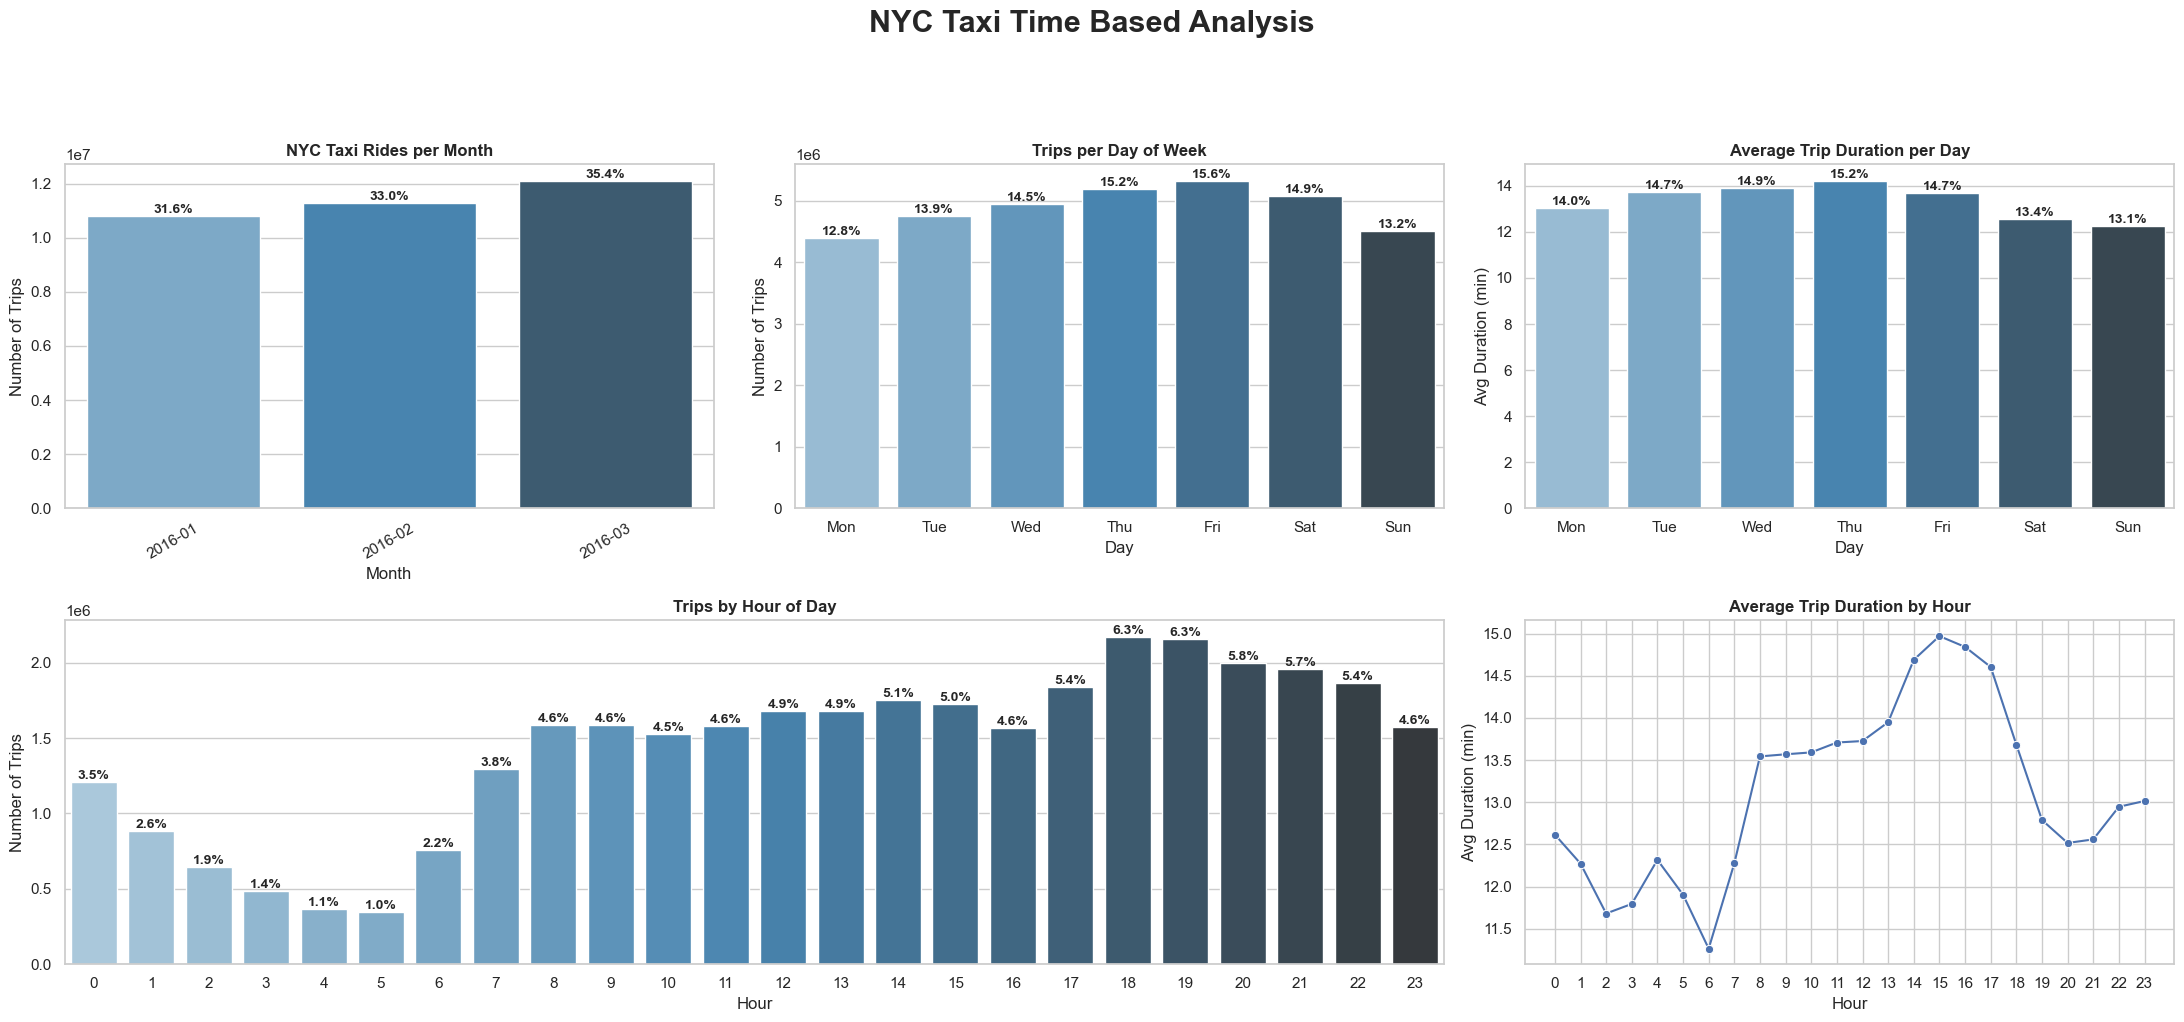

In [8]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

# Load parquet
path = r"F:\project\nyc_taxi_final.parquet"
columns = ["tpep_pickup_datetime", "duration_min", "trip_distance", "fare_amount", "tip_amount"]

dfs = []
for batch in pq.ParquetFile(path).iter_batches(batch_size=500_000, columns=columns):
    dfs.append(batch.to_pandas())
df = pd.concat(dfs, ignore_index=True)

# Datetime features
df['pickup_dt'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour'] = df['pickup_dt'].dt.hour
df['day_of_week'] = df['pickup_dt'].dt.dayofweek
df['year_month'] = df['pickup_dt'].dt.to_period("M")
weekday_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Aggregations
trip_count_by_month = df.groupby('year_month').size()
trip_count_by_day = df.groupby('day_of_week').size()
avg_duration_by_day = df.groupby('day_of_week')['duration_min'].mean()
trip_count_by_hour = df.groupby('hour').size()
avg_duration_by_hour = df.groupby('hour')['duration_min'].mean()

# Dashboard
sns.set_style("whitegrid")
fig = plt.figure(figsize=(22,10))
gs = gridspec.GridSpec(2, 3, figure=fig, height_ratios=[1,1])

# Top row: 3 visuals
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

# Bottom row: 2 visuals, each spans 1.5 columns
ax4 = fig.add_subplot(gs[1,0:2])
ax5 = fig.add_subplot(gs[1,2])

def add_percentage_labels(ax, values):
    total = values.sum()
    for p, val in zip(ax.patches, values):
        pct = val / total * 100
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{pct:.1f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 1. Trips per month
sns.barplot(ax=ax1, x=trip_count_by_month.index.astype(str), y=trip_count_by_month.values, palette="Blues_d")
ax1.set_title("NYC Taxi Rides per Month", fontweight='bold')
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Trips")
ax1.tick_params(axis="x", rotation=30)
add_percentage_labels(ax1, trip_count_by_month.values)

# 2. Trips per day
sns.barplot(ax=ax2, x=trip_count_by_day.index, y=trip_count_by_day.values, palette="Blues_d")
ax2.set_title("Trips per Day of Week", fontweight='bold')
ax2.set_xlabel("Day")
ax2.set_ylabel("Number of Trips")
ax2.set_xticks(range(7))
ax2.set_xticklabels(weekday_names)
add_percentage_labels(ax2, trip_count_by_day.values)

# 3. Avg duration by day
sns.barplot(ax=ax3, x=avg_duration_by_day.index, y=avg_duration_by_day.values, palette="Blues_d")
ax3.set_title("Average Trip Duration per Day", fontweight='bold')
ax3.set_xlabel("Day")
ax3.set_ylabel("Avg Duration (min)")
ax3.set_xticks(range(7))
ax3.set_xticklabels(weekday_names)
add_percentage_labels(ax3, avg_duration_by_day.values)

# 4. Trips by hour
sns.barplot(ax=ax4, x=trip_count_by_hour.index, y=trip_count_by_hour.values, palette="Blues_d")
ax4.set_title("Trips by Hour of Day", fontweight='bold')
ax4.set_xlabel("Hour")
ax4.set_ylabel("Number of Trips")
ax4.set_xticks(range(0,24))
add_percentage_labels(ax4, trip_count_by_hour.values)

# 5. Avg duration by hour
sns.lineplot(ax=ax5, x=avg_duration_by_hour.index, y=avg_duration_by_hour.values, marker="o")
ax5.set_title("Average Trip Duration by Hour", fontweight='bold')
ax5.set_xlabel("Hour")
ax5.set_ylabel("Avg Duration (min)")
ax5.set_xticks(range(0,24))
ax5.grid(True)

# Title
plt.suptitle("NYC Taxi Time Based Analysis", fontsize=22, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


> ## When Do People Ride Taxis? A Time Series Perspective

> ## Monthly Trends:
- Seasonal variation visible: summer months (and holiday seasons) show increased ride demand.
- January–February usually have lower ride counts, consistent with winter slowdown.
>**Insight:** Ride volume shows a steady upward trend in the first quarter, indicating growing demand.

> ## Weekday Patterns:
- Fridays and Saturdays show higher ride volumes compared to weekdays.
- Mondays and Tuesdays tend to be the quietest days.
>**Insight:** Demand peaks toward the end of the workweek, reflecting both commuting and social activity.

> ## Average Trip Duration per Day of Week
- Weekday trips (esp. Mon–Thu) have slightly longer average durations, likely due to work commute traffic.
- Weekend trips are shorter on average, suggesting leisure/nightlife rides closer to home.
>**Insight:** Longer weekday trips highlight the impact of rush-hour traffic, while weekends see quicker, local trips.

> ## Hourly Patterns (Summary)
- Ride demand peaks twice daily → morning commute (8–9 AM) and evening rush (6–9 PM).
- Demand drops sharply after midnight, lowest between 2–5 AM.
>**Insight:** NYC taxi demand has two clear peaks Morning and evening with lowest activity in the early hours.

> ## Average Trip Duration by Hour
- Trips are longest during rush hours (morning/evening traffic).
- Shorter trip durations observed late at night, likely due to free-flowing traffic.
>**Insight:** Trip length is directly influenced by congestion, peaking during traditional commute hours.



> ## Revenue Analysis 

Total Revenue: $ 534,199,214.88
Average Revenue per Trip: $ 15.62


C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\1033838223.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,0], x='weekday', y='total_amount', data=weekly_revenue, palette="Blues_d")
C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\1033838223.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0,1], x='hour', y='total_amount', data=hourly_revenue, palette="Blues_d")
C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\1033838223.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1,0], x='ratecode_label', y='tota

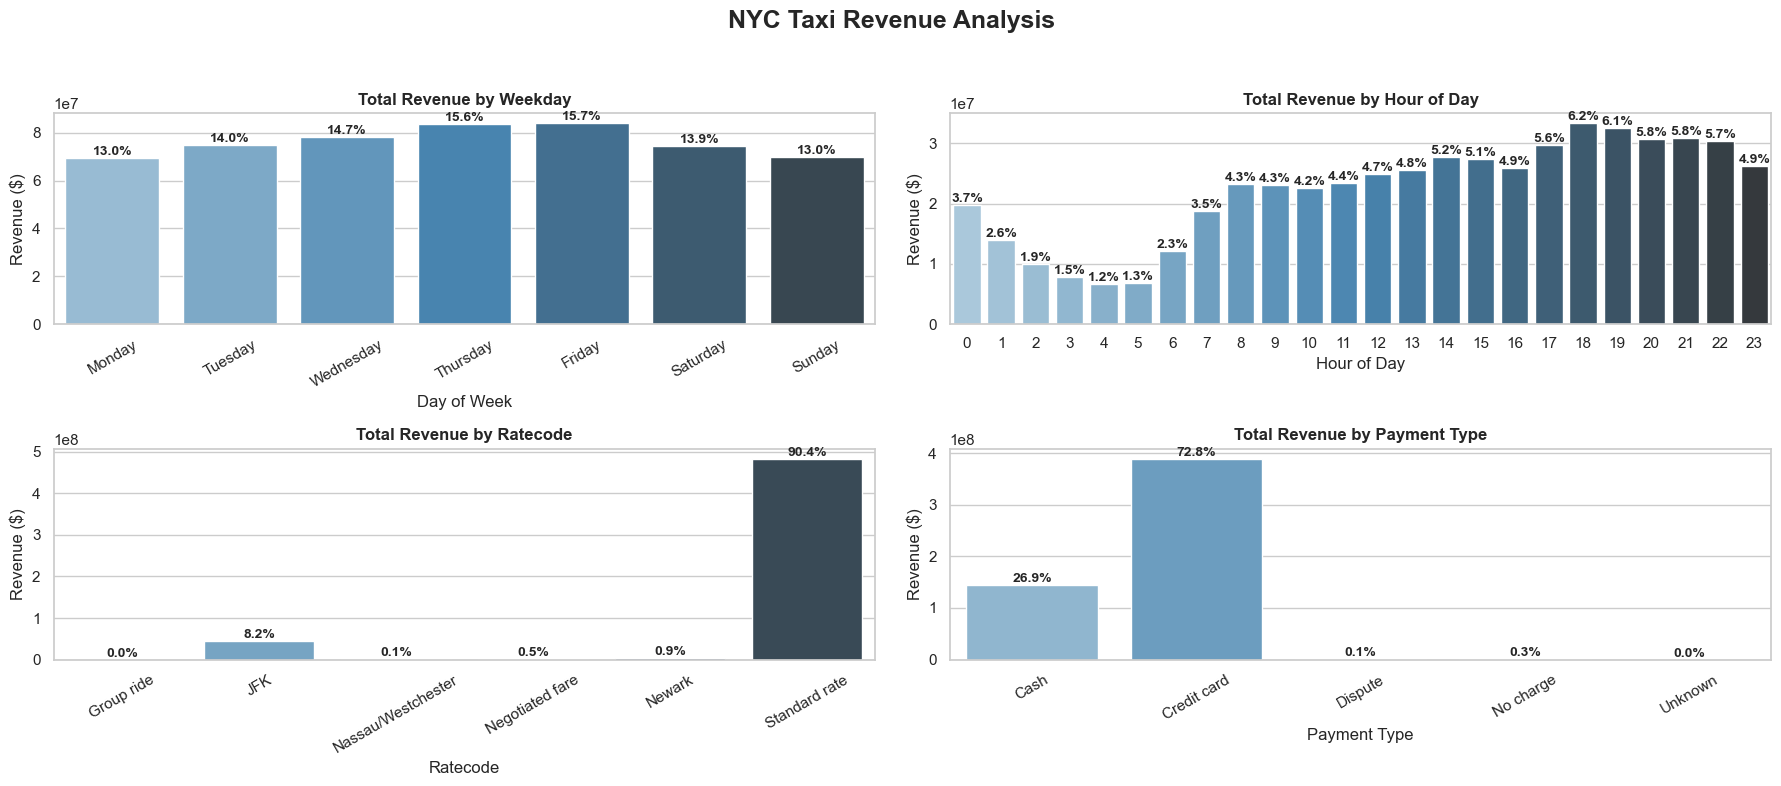

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Path to your cleaned dataset
path = r"F:\project\nyc_taxi_final.parquet"

# Read columns we need 
use_cols = ["tpep_pickup_datetime", "total_amount", "ratecodeid", "payment_type"]
df = pd.read_parquet(path, columns=use_cols)

# ---- Metrics ----
total_revenue = df["total_amount"].sum()
avg_revenue = df["total_amount"].mean()

print("Total Revenue: $", f"{total_revenue:,.2f}")
print("Average Revenue per Trip: $", round(avg_revenue, 2))

# ---- Feature Engineering ----
df['weekday'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# ---- Grouped Data ----
weekly_revenue = df.groupby('weekday')['total_amount'].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()

hourly_revenue = df.groupby('hour')['total_amount'].sum().reset_index()

ratecode_map = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau/Westchester",
    5: "Negotiated fare",
    6: "Group ride"
}
df['ratecode_label'] = df['ratecodeid'].map(ratecode_map)
ratecode_revenue = df.groupby('ratecode_label')['total_amount'].sum().reset_index()

payment_map = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}
df['payment_label'] = df['payment_type'].map(payment_map)
payment_revenue = df.groupby('payment_label')['total_amount'].sum().reset_index()

# ---- Function to add % labels ----
def add_percentage_labels(ax, values):
    total = values.sum()
    for p, val in zip(ax.patches, values):
        pct = val / total * 100
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{pct:.1f}%', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# ---- Create Wide Dashboard Canvas ----
fig, axes = plt.subplots(2, 2, figsize=(18, 8))  # wider than tall

# Weekly Revenue
sns.barplot(ax=axes[0,0], x='weekday', y='total_amount', data=weekly_revenue, palette="Blues_d")
axes[0,0].set_title('Total Revenue by Weekday', fontweight='bold')
axes[0,0].set_xlabel('Day of Week')
axes[0,0].set_ylabel('Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=30)
add_percentage_labels(axes[0,0], weekly_revenue['total_amount'])

# Hourly Revenue
sns.barplot(ax=axes[0,1], x='hour', y='total_amount', data=hourly_revenue, palette="Blues_d")
axes[0,1].set_title('Total Revenue by Hour of Day', fontweight='bold')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Revenue ($)')
add_percentage_labels(axes[0,1], hourly_revenue['total_amount'])

# Revenue by Ratecode
sns.barplot(ax=axes[1,0], x='ratecode_label', y='total_amount', data=ratecode_revenue, palette="Blues_d")
axes[1,0].set_title('Total Revenue by Ratecode', fontweight='bold')
axes[1,0].set_xlabel('Ratecode')
axes[1,0].set_ylabel('Revenue ($)')
axes[1,0].tick_params(axis='x', rotation=30)
add_percentage_labels(axes[1,0], ratecode_revenue['total_amount'])

# Revenue by Payment Type
sns.barplot(ax=axes[1,1], x='payment_label', y='total_amount', data=payment_revenue, palette="Blues_d")
axes[1,1].set_title('Total Revenue by Payment Type', fontweight='bold')
axes[1,1].set_xlabel('Payment Type')
axes[1,1].set_ylabel('Revenue ($)')
axes[1,1].tick_params(axis='x', rotation=30)
add_percentage_labels(axes[1,1], payment_revenue['total_amount'])

plt.suptitle("NYC Taxi Revenue Analysis", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for main title
plt.show()


> ## When the city earns the most from these rides?

> ## Weekday Patterns:
- Thursday and Friday generate the highest revenue (~$8.5M each)
- Weekdays consistently outperform weekends. business travel and commuting drive demand
- Sunday and Monday shows the lowest revenue (~$7M), typical for reduced activity
>**Insight:** Revenue is business-driven, with weekdays especially late in the week. Delivering the strongest earnings.

> ## Hours of the Day:
- Evening rush hours (6-7 PM) are the absolute peak revenue period
- Late evening (8-10 PM) remains very strong .Likely dinner, entertainment, and nightlife
- Early morning (3-6 AM) shows the lowest revenue .Minimal demand during these hours
>**Insight:** Revenue steadily builds from morning through evening, peaking around 6-7 PM

> ## Payment Methods:
- Credit card payments dominate (~$4M vs ~$1.5M cash)
>**Insight:** This suggests higher fare trips or customer preference for card convenience

> ## Rate Codes:
- Standard rate trips generate nearly all revenue (~$5M)
>**Insight:** JFK airport trips contribute modestly but are a small fraction of total volume

>**Insight:** Key Insight: The city's taxi revenue follows classic urban patterns .Weekday business activity drives the bulk of earnings, with evening rush hour and nightlife being the golden hours for taxi revenue generation.

> ## Fare Prediction Model

Fare Prediction Model Results:
R² Score: 0.9503 (95.0% of variance explained)
RMSE: 2.23
MAE: $0.72

Feature Importance (Linear Regression Coefficients):
         Feature  Coefficient
0  trip_distance     1.919349
2   tolls_amount     0.481518
1   duration_min     0.298140

Model Equation:
Fare = 2.73 + 1.92*(trip_distance) + 0.30*(duration_min) + 0.48*(tolls_amount) 


C:\Users\MYSQ\AppData\Local\Temp\ipykernel_13932\3244856472.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


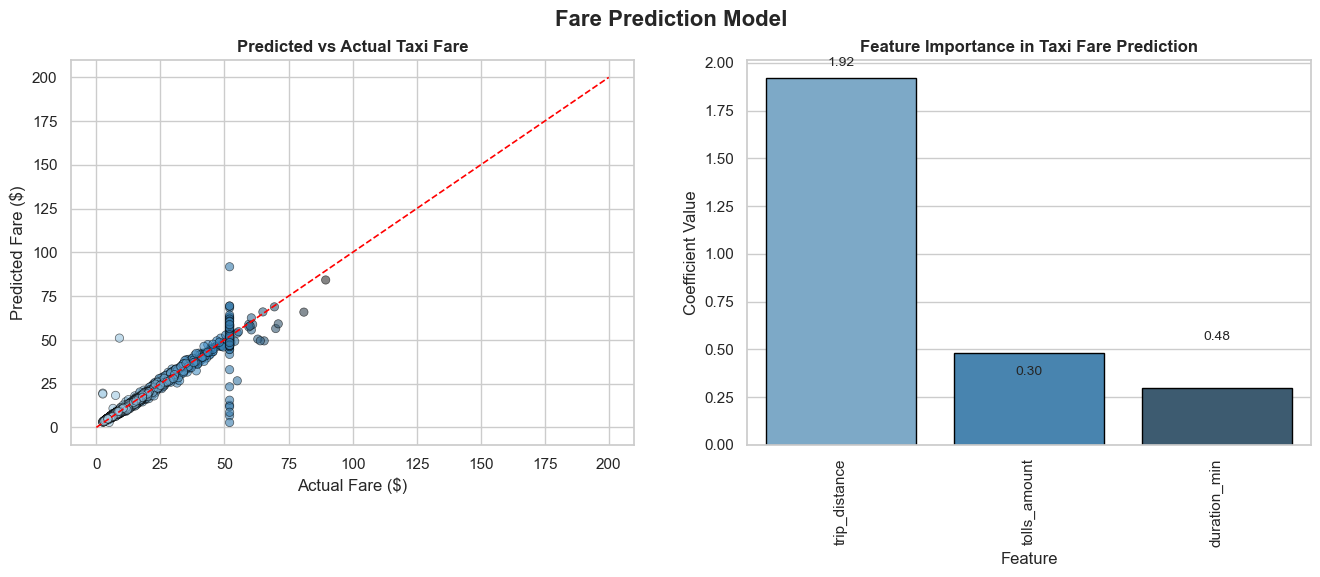

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# === Load data ===
path = r"F:\project\nyc_taxi_final.parquet"
use_cols = ["fare_amount", "trip_distance", "duration_min", "tolls_amount"]
df = pd.read_parquet(path, columns=use_cols)

# Drop invalid rows
df = df[(df["fare_amount"] > 0) & (df["trip_distance"] > 0) & (df["duration_min"] > 0)]

# Features and target
X = df[["trip_distance", "duration_min", "tolls_amount"]]
y = df["fare_amount"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Train linear regression ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Predictions ===
y_pred = model.predict(X_test)

# === Evaluation ===
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print("Fare Prediction Model Results:")
print(f"R² Score: {r2:.4f} ({r2*100:.1f}% of variance explained)")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: ${mae:.2f}") 

# === Coefficients ===
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance (Linear Regression Coefficients):")
print(coefficients)

# === Model equation ===
intercept = model.intercept_
coef_dict = dict(zip(X.columns, model.coef_))
equation = f"Fare = {intercept:.2f} "
for feature, coef in coef_dict.items():
    sign = "+" if coef >= 0 else "-"
    equation += f"{sign} {abs(coef):.2f}*({feature}) "
print("\nModel Equation:")
print(equation)


fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle("Fare Prediction Model", fontsize=16, weight="bold") 

# Scatter plot: Predicted vs Actual
sns.scatterplot(
    x=y_test[:5000],
    y=y_pred[:5000],
    hue=y_test[:5000],
    palette="Blues_d",
    alpha=0.6,
    edgecolor="black",
    linewidth=0.5,
    legend=False,
    ax=axes[0]
)
axes[0].plot([0, 200], [0, 200], color="red", linestyle="--", linewidth=1.2)
axes[0].set_xlabel("Actual Fare ($)")
axes[0].set_ylabel("Predicted Fare ($)")
axes[0].set_title("Predicted vs Actual Taxi Fare", fontsize=12, weight="bold")


# Bar plot: Feature Importance with coefficient values 
sns.barplot(
    x="Feature",
    y="Coefficient",
    data=coefficients,
    palette="Blues_d",
    edgecolor="black",
    ax=axes[1]
)
axes[1].set_xlabel("Feature")
axes[1].set_ylabel("Coefficient Value")
axes[1].set_title("Feature Importance in Taxi Fare Prediction", fontsize=12, weight="bold")
axes[1].tick_params(axis='x', rotation=90) 

# Add coefficient value on top of bars
for idx, row in coefficients.iterrows():
    axes[1].text(
        idx, 
        row['Coefficient'] + 0.05,  
        f"{row['Coefficient']:.2f}", 
        ha='center', va='bottom', fontsize=10
    )


## Fare Prediction Model Results

Our fare prediction model uses three key trip features — distance, duration, and tolls — to estimate NYC taxi fares.

### Model Performance
- **R² Score:** 0.950 (95% of variance explained)  
- **RMSE:** 2.23  
- **MAE:** $0.72  
> The model captures most of the fare variability, showing strong predictive power.

> ## Feature Importance (Linear Regression Coefficients)
- **Trip Distance:** `1.92 per mile`  the most significant driver of fare.
- **Tolls Amount:** `0.48$` adds moderate influence on fare.
- **Duration (minutes):** `0.30 per min` contributes slightly less than tolls, but still important.

> **Insight:** Trip distance is the dominant factor in fare prediction, while tolls and trip duration provide secondary contributions. The model’s high R² shows that these three features capture the key determinants of NYC taxi fares.

> ## Fare Prediction Formula:
> fare_amount = 2.73 + 1.92 x trip_distance + 0.30 x duration_min + 0.48 x tolls_amount

> ## Strategies for NYC Taxi Optimization

> ## Focus on High-Demand Times & Days 
- Deploy more taxis on Thursdays, Fridays, weekends, and rush hours to capture peak demand. 
> ## Optimize Pricing with Distance as Key Driver 
- Since distance impacts fare the most, pricing strategies and promotions should consider trip length. 
> ## Improve Service Efficiency During Congestion
- Use traffic-aware routing and dynamic scheduling to reduce delays, since trip duration also influences fares and customer satisfaction
